In [3]:
install.packages("MASS")



The downloaded binary packages are in
	/var/folders/rd/jfxc79756t9g0g5f4ytyb6l40000gn/T//RtmpYOno2q/downloaded_packages


In [5]:
library(MASS)

In [7]:
data(cats)

In [9]:
head(cats)

,Sex,Bwt,Hwt
,<fct>,<dbl>,<dbl>
1,F,2.0,7.0
2,F,2.0,7.4
3,F,2.0,9.5
4,F,2.1,7.2
5,F,2.1,7.3
6,F,2.1,7.6


In [11]:
?cats

cats {MASS},R Documentation


In [13]:
install.packages("ggplot2")



The downloaded binary packages are in
	/var/folders/rd/jfxc79756t9g0g5f4ytyb6l40000gn/T//RtmpYOno2q/downloaded_packages


In [15]:
library(ggplot2)

a) Plot heart weight on the vertical axis and body weight on the horizontal axis, using different colors
or point characters to distinguish between male and female cats. Annotate your plot with a legend
and appropriate axis labels.

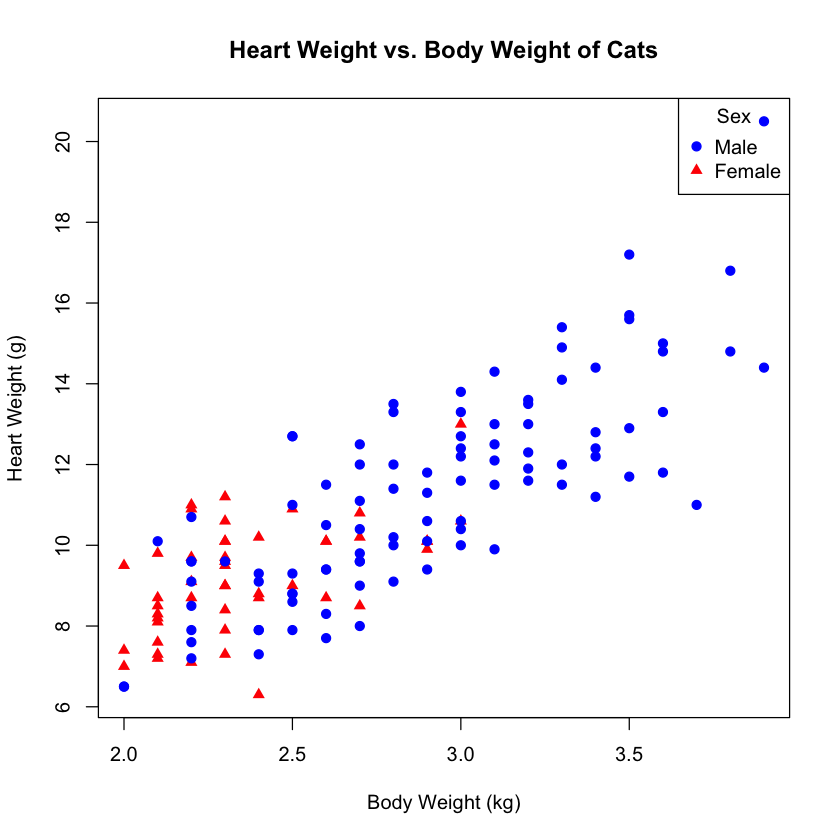

In [28]:
plot(cats$Bwt, cats$Hwt, 
     col = ifelse(cats$Sex == "M", "blue", "red"), 
     pch = ifelse(cats$Sex == "M", 19, 17),
     xlab = "Body Weight (kg)",
     ylab = "Heart Weight (g)",
     main = "Heart Weight vs. Body Weight of Cats")


legend("topright", 
       title = "Sex",
       legend = c("Male", "Female"), 
       col = c("blue", "red"), 
       pch = c(19, 17))

Based on this graph it displays Males having Heart Weight larger as well as Body Weight larger compared to Female. 

b) Fit a least-squares multiple linear regression model using heart weight as the response variable and
the other two variables as predictors and view a model summary.

In [39]:
model <- lm(Hwt ~ Bwt + Sex, data = cats)

In [41]:
summary(model)


Call:
lm(formula = Hwt ~ Bwt + Sex, data = cats)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5833 -0.9700 -0.0948  1.0432  5.1016 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.4149     0.7273  -0.571    0.569    
Bwt           4.0758     0.2948  13.826   <2e-16 ***
SexM         -0.0821     0.3040  -0.270    0.788    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.457 on 141 degrees of freedom
Multiple R-squared:  0.6468,	Adjusted R-squared:  0.6418 
F-statistic: 129.1 on 2 and 141 DF,  p-value: < 2.2e-16


c) Write down the equation for the fitted model and interpret the estimated regression coefficients for
body weight and sex. Are both statistically significant? What does this say about the relationship
between the response and predictors?

Based on output from Linear Regression Model. 
Hwt=−0.4149+4.0758×Bwt−0.0821×SexM
----------------------------------
HWT is heart weight. Bwt is body weight. and SexM is either male or female. 

            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.4149     0.7273  -0.571    0.569    
# This is the estimated heart weight when body weight is zero and the cat is female which shows a pr(.|t|) which is .579 which means the intercept is not statistically signifcant

For Body Weight (Bwt)
Bwt           4.0758     0.2948  13.826   <2e-16 ***

# For each additonal kilogram of body weight, the heart weight is expected to increase by approximately 4.0758 grams. The Pr(>|t|)  =  <2e-16 *** means there is a strong positive correlation between body weight and heart weight. 

For Sex . 

SexM         -0.0821     0.3040  -0.270    0.788    

# Sex has no significant effect on heart weight when body weight is accounted for. 

# The conclusion from the data above shows that Body Weight is a significant predictor of heart weight. Which means as body weight goes up so does heart weight.  Sex has no factor in Heart Weight. 

d) Report and interpret the coefficient of determination and the outcome of the omnibus F -test.

The R adjusted and multiplied are .6468 which is 64 percent of variability in heart weight can be explained by a model that includes body weight and sex. This is a good fit for the model.

The p-value being p-value: < 2.2e-16 shows that the null hypothesis is rejected which was that their is no significant effect on heart weight with the predictors of body weight and sex. There is an impact on the predictors of body weight and sex on heart weight since p-value is so low. 

F-Statistic of 129.1 with the two predictors and 141 degree of freedom indicate that the model with body weight and sex is highly significant. 

Since my data is 144. It is better to have higher degrees of freedom than lower. 

e) Tilman’s cat, Sigma, is a 3.4 kg female. Use your model to estimate her mean heart weight and
provide a 95% prediction interval.

In [61]:
model <- lm(Hwt ~ Bwt + Sex, data = cats)

In [114]:
new_cat_data <- data.frame(Bwt = 3.4, Sex = "F")
#parameters for Sigma

In [116]:
prediction <- predict(model, new_cat_data, interval = "prediction", level = 0.95)


In [118]:
print(prediction)

       fit      lwr      upr
1 13.44266 10.46904 16.41628


Based on this prediction 95 percent of heart weight would fall between 10.46904 to 16.41628. With fitted being 13.44266. This is if the cat is a female and has a body weight of 3.4 kg. 

In [127]:
predicted_value <- data.frame(Bwt = 3.4, fit = 13.44266, lwr = 10.46904, upr = 16.41628)
# Hard code the values I received above for my 95 percent prediction model. 

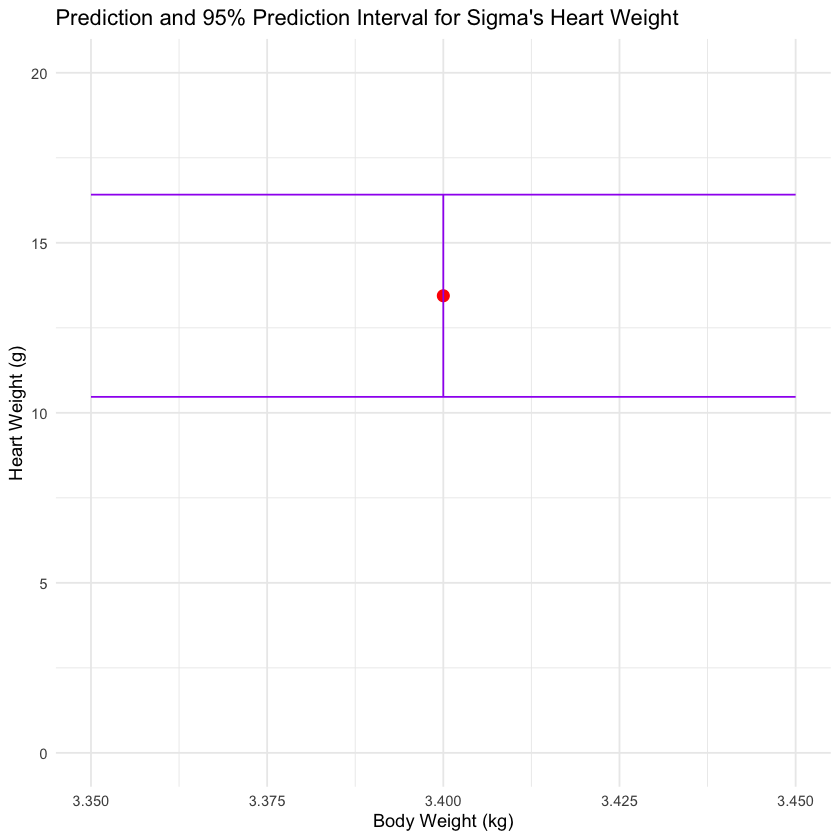

In [129]:
ggplot(predicted_value, aes(x = Bwt, y = fit)) +
  geom_point(color = "red", size = 3) +  # Sigma's predicted heart weight
  geom_errorbar(aes(ymin = lwr, ymax = upr), width = 0.1, color = "Purple") +  # Prediction interval
  labs(title = "Prediction and 95% Prediction Interval for Sigma's Heart Weight",
       x = "Body Weight (kg)",
       y = "Heart Weight (g)") +
  theme_minimal() +
  ylim(0, 20) 

This outputs upper and lower boundary limit as well as fitted prediction of heart weight for cat that has body weight of 3.4 kg. This is 95 prediction interval. 

f) Use predict to superimpose continuous lines based on the fitted linear model on your plot from (a),
one for male cats and one for female. What do you notice? Does this reflect the statistical
significance (or lack thereof) of the parameter estimates?

In [169]:
data(cats)
#uploading the same data as prior

In [173]:
model <- lm(Hwt ~ Bwt + Sex, data = cats)
#Using my model

In [175]:
body_weights <- seq(min(cats$Bwt), max(cats$Bwt), length.out = 144)
#using my data points to create a sequence of weights that fall between the max and min. Goal is to have evenly spaced values. Want to match original dataset so i choose 144.. 

In [177]:
female_preds <- data.frame(Bwt = body_weights, Sex = "F")
female_preds$Hwt <- predict(model, newdata = female_preds)

male_preds <- data.frame(Bwt = body_weights, Sex = "M")
male_preds$Hwt <- predict(model, newdata = male_preds)

#The generated body weights are used to determine heart weights. I want to seperate male and female. 

In [179]:
cats$fit <- predict(model, interval = "confidence")[, "fit"]
cats$lwr <- predict(model, interval = "confidence")[, "lwr"]
cats$upr <- predict(model, interval = "confidence")[, "upr"]

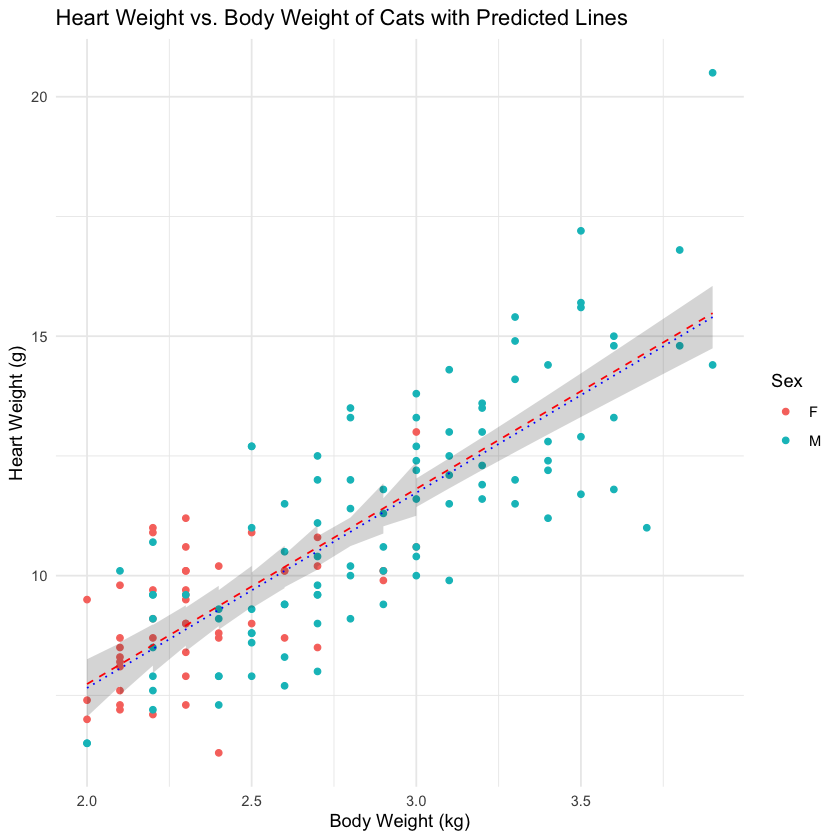

In [181]:
ggplot(cats, aes(x = Bwt, y = Hwt, color = Sex)) +
  geom_point() +  # Original data points
  geom_ribbon(aes(ymin = lwr, ymax = upr), alpha = 0.2, color = NA) +  # Confidence interval
  geom_line(data = female_preds, aes(x = Bwt, y = Hwt), color = "red", linetype = "dashed") +  # Line for female cats
  geom_line(data = male_preds, aes(x = Bwt, y = Hwt), color = "blue", linetype = "dotted") +  # Line for male cats
  labs(title = "Heart Weight vs. Body Weight of Cats with Predicted Lines",
       x = "Body Weight (kg)",
       y = "Heart Weight (g)",
       color = "Sex") +
  theme_minimal()

Based on the observation above. Sex does not play any role in prediciting heart weight. Male and Female are both the same. 

2. A certain spare part is manufactured, X is the number of parts produced in a month, and Y is the
needed man-hours. The following table contains data on the recent 10 month.
Month i X(i) Y(i)
1 30 73
2 20 50
3 60 128
4 80 170
5 40 87
6 50 108
7 60 135
8 30 69
9 70 148
10 60 132
(a) Draw a scatter plot with horizontal axis X and vertical axis Y

In [185]:
My_data <- data.frame(
  Month = 1:10,
  X = c(30, 20, 60, 80, 40, 50, 60, 30, 70, 60),
  Y = c(73, 50, 128, 170, 87, 108, 135, 69, 148, 132)
)

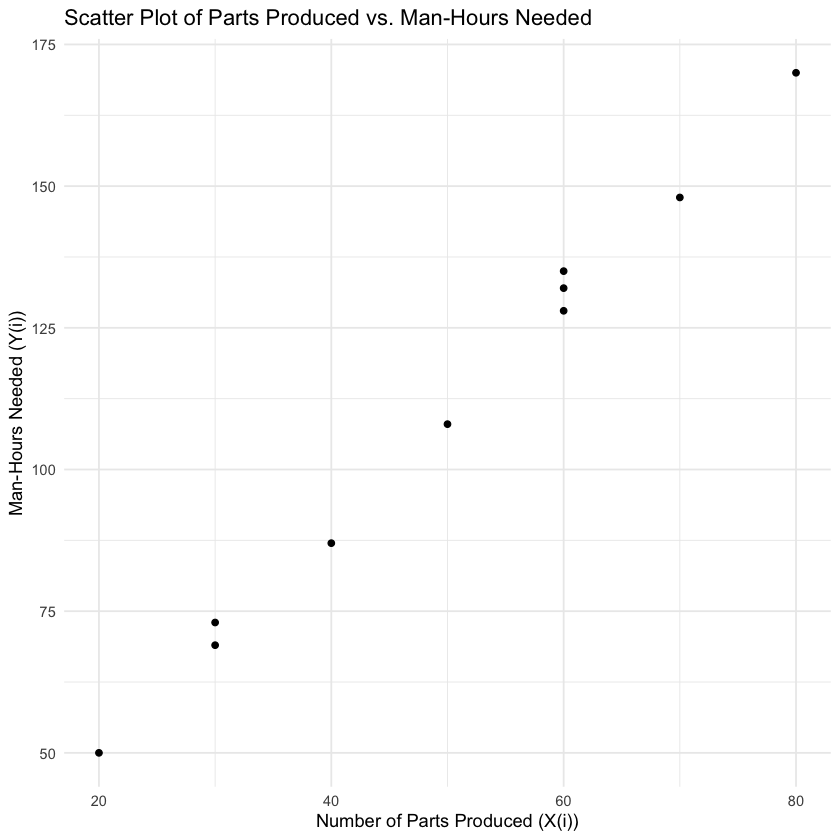

In [195]:
ggplot(My_data, aes(x = X, y = Y)) +
  geom_point() +
  labs(title = "Scatter Plot of Parts Produced vs. Man-Hours Needed",
       x = "Number of Parts Produced (X(i))",
       y = "Man-Hours Needed (Y(i))") +
  theme_minimal()

This plot above shows parts produced on x-axis and man hours produced on y-axis using data points. This is scatter plot displayed. 

(b) Suppose that the manager of the facility suggested the following approximate relation between
Yh and X is the equation:
Yh(i) = 9.5 + 2.1 X(i)
Compute Yh(i) for the given ten X(i)’s